This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition

Data Science Workflow:
1.  Mount drive
2.  Import libraries
3.  Import/load file
4.  EDA
5.  Data Cleaning
6.  Data visualization
7.  Data pre-processing
8.  Machine learning
9.  Deep learning
10. Model evaluation
11. Save the model


##Data Dictionary

Gender

Age

Height

Weight

Frequent consumption of high caloric food (FAVC)

Frequency of consumption of vegetables (FCVC)

Number of main meals (NCP)

Consumption of food between meals (CAEC)

Consumption of water daily (CH20)

Consumption of alcohol (CALC)

Calories consumption monitoring (SCC)

Physical activity frequency (FAF)

Time using technology devices (TUE)

Transportation used (MTRANS)

Obesity Levels (NObeyesdad)

Body Mass Index classification
- Underweight Less than 18.5
- Normal 18.5 to 24.9
- Overweight 25.0 to 29.9
- Obesity I 30.0 to 34.9
- Obesity II 35.0 to 39.9
- Obesity III Higher than 40

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import heatmap

# preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline


# models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


# metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [9]:
# load data and show all columns
filename = ('Obesity.csv')
df = pd.read_csv(filename)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [10]:
df.shape

(2111, 17)

The dataset has 2111 rows and 17 columns.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [12]:
df.duplicated().sum()

24

There are 24 duplicates.

In [13]:
df[df.duplicated(keep = False)]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
97,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
105,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
145,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
208,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight


In [14]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

Duplicates were dropped.

In [15]:
df.shape

(2087, 17)

After removing duplicates, the dataset now has 2087 rows and 17 columns

In [16]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

There are no missing values.

In [17]:
df = df.rename(columns={'FCVC': 'Frequency_vegetable_consumption',
                        'NCP': 'Number_of_main_meals',
                        'CH2O':'Daily_water_consumption',
                        'FAF': 'Frequency_physical_activity',
                        'TUE': 'Time_using_technology_devices',
                        'FAVC':'Frequency_highcaloricfood_consumption',
                        'CAEC': 'Consumption_food_between_meals',
                        'SMOKE': 'Smoking_status',
                        'SCC': 'Monitoring_calorie_consumption',
                        'CALC': 'Alcohol_consumption',
                        'MTRANS': 'Transportation_used',
                        'family_history_with_overweight': 'Family_history_with_overweight',
                        'NObeyesdad': 'Obesity_Levels',
                      })
df.head()

,Gender,Age,Height,Weight,Family_history_with_overweight,Frequency_highcaloricfood_consumption,Frequency_vegetable_consumption,Number_of_main_meals,Consumption_food_between_meals,Smoking_status,Daily_water_consumption,Monitoring_calorie_consumption,Frequency_physical_activity,Time_using_technology_devices,Alcohol_consumption,Transportation_used,Obesity_Levels
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Columns were renamed to be more descriptive

In [18]:
df.describe()

,Age,Height,Weight,Frequency_vegetable_consumption,Number_of_main_meals,Daily_water_consumption,Frequency_physical_activity,Time_using_technology_devices
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [19]:
df.describe(include = 'object')

,Gender,Family_history_with_overweight,Frequency_highcaloricfood_consumption,Consumption_food_between_meals,Smoking_status,Monitoring_calorie_consumption,Alcohol_consumption,Transportation_used,Obesity_Levels
count,2087,2087,2087,2087,2087,2087,2087,2087,2087
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1052,1722,1844,1761,2043,1991,1380,1558,351


In [20]:
# check outliers using zscore
from scipy import stats

# create a var that includes only numeric columns
cols_to_check = df.select_dtypes(include = [np.number]).columns

# create a loop that detects outliers using the zscore
for column in cols_to_check:
  # calculate zscore for the col
  z_scores = np.abs(stats.zscore(df[column]))
  # find the indices where the zscore is > 3
  outlier_indices = np.where(z_scores > 3)
  # return the actual outlier values using the indices
  outlier_values = df[column].iloc[outlier_indices]
  # return the outliers and their indices
  print(f'outliers in {column}: \n', outlier_values)

outliers in Age: 
 21      52.000000
92      55.000000
133     61.000000
137     44.000000
161     55.000000
169     45.000000
232     51.000000
252     56.000000
492     45.000000
1013    55.246250
1034    50.832559
1063    45.000000
1088    55.137881
1101    46.491859
1158    55.022494
1179    47.706100
1208    45.821267
1215    43.604901
1267    43.510672
1286    47.283374
1305    43.591999
1386    43.719395
1490    43.726081
Name: Age, dtype: float64
outliers in Height: 
 Series([], Name: Height, dtype: float64)
outliers in Weight: 
 344    173.0
Name: Weight, dtype: float64
outliers in Frequency_vegetable_consumption: 
 Series([], Name: Frequency_vegetable_consumption, dtype: float64)
outliers in Number_of_main_meals: 
 Series([], Name: Number_of_main_meals, dtype: float64)
outliers in Daily_water_consumption: 
 Series([], Name: Daily_water_consumption, dtype: float64)
outliers in Frequency_physical_activity: 
 Series([], Name: Frequency_physical_activity, dtype: float64)
outliers

There are outliers in the Age and Weight columns but these are not unrealistic values and could represent important information.

In [23]:
# save clean dataset for loading later for preprocessing
cleaned_df = df.copy()
cleaned_df.to_excel('cleaned_dataset.xlsx', index=False)
cleaned_df.head()

,Gender,Age,Height,Weight,Family_history_with_overweight,Frequency_highcaloricfood_consumption,Frequency_vegetable_consumption,Number_of_main_meals,Consumption_food_between_meals,Smoking_status,Daily_water_consumption,Monitoring_calorie_consumption,Frequency_physical_activity,Time_using_technology_devices,Alcohol_consumption,Transportation_used,Obesity_Levels
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [24]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 2087 non-null   object 
 1   Age                                    2087 non-null   float64
 2   Height                                 2087 non-null   float64
 3   Weight                                 2087 non-null   float64
 4   Family_history_with_overweight         2087 non-null   object 
 5   Frequency_highcaloricfood_consumption  2087 non-null   object 
 6   Frequency_vegetable_consumption        2087 non-null   float64
 7   Number_of_main_meals                   2087 non-null   float64
 8   Consumption_food_between_meals         2087 non-null   object 
 9   Smoking_status                         2087 non-null   object 
 10  Daily_water_consumption                2087 non-null   float64
 11  Monitorin

In [25]:
# ordinal encode the dataset for visualization purposes
# Ordinal Encoding 'Obesity_Levels'
change_dictionary = {'Normal_Weight':0,
                     'Overweight_Level_I':1,
                     'Overweight_Level_II':2,
                     'Obesity_Type_I':3,
                     'Obesity_Type_II':4,
                     'Obesity_Type_III':5,
                     'Insufficient_Weight':6,}
df['Obesity_Levels'].replace(change_dictionary, inplace=True)
df['Obesity_Levels']

/var/folders/_r/6v7clryx7gn9b9wdwm296pk40000gn/T/ipykernel_5987/1938071875.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Obesity_Levels'].replace(change_dictionary, inplace=True)
/var/folders/_r/6v7clryx7gn9b9wdwm296pk40000gn/T/ipykernel_5987/1938071875.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downc

0       0
1       0
2       0
3       1
4       2
       ..
2106    5
2107    5
2108    5
2109    5
2110    5
Name: Obesity_Levels, Length: 2087, dtype: int64

In [26]:
df['Obesity_Levels'].value_counts()

Obesity_Levels
3    351
5    324
4    297
2    290
0    282
1    276
6    267
Name: count, dtype: int64

In [27]:
df['Gender'].value_counts()

Gender
Male      1052
Female    1035
Name: count, dtype: int64

In [28]:
# ordinal encode the dataset for visualization purposes
# Ordinal Encoding 'Gender'
change_dictionary = {'Male':0,
                     'Female':1,
                  }
df['Gender'].replace(change_dictionary, inplace=True)
df['Gender']

/var/folders/_r/6v7clryx7gn9b9wdwm296pk40000gn/T/ipykernel_5987/1422272263.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace(change_dictionary, inplace=True)
/var/folders/_r/6v7clryx7gn9b9wdwm296pk40000gn/T/ipykernel_5987/1422272263.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', T

0       1
1       1
2       0
3       0
4       0
       ..
2106    1
2107    1
2108    1
2109    1
2110    1
Name: Gender, Length: 2087, dtype: int64

In [29]:
df['Family_history_with_overweight'].unique()

array(['yes', 'no'], dtype=object)

In [30]:
# ordinal encode the dataset for visualization purposes
# Ordinal Encoding 'Family History with Overweight'
change_dictionary = {'yes':0,
                     'no':1,
                  }
df['Family_history_with_overweight'].replace(change_dictionary, inplace=True)
df['Family_history_with_overweight']

/var/folders/_r/6v7clryx7gn9b9wdwm296pk40000gn/T/ipykernel_5987/198969766.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Family_history_with_overweight'].replace(change_dictionary, inplace=True)
/var/folders/_r/6v7clryx7gn9b9wdwm296pk40000gn/T/ipykernel_5987/198969766.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_

0       0
1       0
2       0
3       1
4       1
       ..
2106    0
2107    0
2108    0
2109    0
2110    0
Name: Family_history_with_overweight, Length: 2087, dtype: int64

In [31]:
df['Family_history_with_overweight'].value_counts()

Family_history_with_overweight
0    1722
1     365
Name: count, dtype: int64

In [32]:
# ordinal encode the dataset for visualization purposes
# Ordinal Encoding 'Frequency_highcaloricfood_consumption'
change_dictionary = {'yes':0,
                     'no':1,
                  }
df['Frequency_highcaloricfood_consumption'].replace(change_dictionary, inplace=True)
df['Frequency_highcaloricfood_consumption']

/var/folders/_r/6v7clryx7gn9b9wdwm296pk40000gn/T/ipykernel_5987/4232955549.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Frequency_highcaloricfood_consumption'].replace(change_dictionary, inplace=True)
/var/folders/_r/6v7clryx7gn9b9wdwm296pk40000gn/T/ipykernel_5987/4232955549.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('f

0       1
1       1
2       1
3       1
4       1
       ..
2106    0
2107    0
2108    0
2109    0
2110    0
Name: Frequency_highcaloricfood_consumption, Length: 2087, dtype: int64

In [33]:
df['Frequency_highcaloricfood_consumption'].value_counts()

Frequency_highcaloricfood_consumption
0    1844
1     243
Name: count, dtype: int64

In [34]:
df.dtypes

Gender                                     int64
Age                                      float64
Height                                   float64
Weight                                   float64
Family_history_with_overweight             int64
Frequency_highcaloricfood_consumption      int64
Frequency_vegetable_consumption          float64
Number_of_main_meals                     float64
Consumption_food_between_meals            object
Smoking_status                            object
Daily_water_consumption                  float64
Monitoring_calorie_consumption            object
Frequency_physical_activity              float64
Time_using_technology_devices            float64
Alcohol_consumption                       object
Transportation_used                       object
Obesity_Levels                             int64
dtype: object

In [35]:
df['Consumption_food_between_meals'].value_counts()

Consumption_food_between_meals
Sometimes     1761
Frequently     236
Always          53
no              37
Name: count, dtype: int64

In [36]:
# ordinal encode the dataset for visualization purposes
# Ordinal Encoding 'Consumption_food_between_meals'
change_dictionary = {'Sometimes':0,
                     'Frequently':1,
                     'Always':2,
                     'no':3,
                  }
df['Consumption_food_between_meals'].replace(change_dictionary, inplace=True)
df['Consumption_food_between_meals']

/var/folders/_r/6v7clryx7gn9b9wdwm296pk40000gn/T/ipykernel_5987/2225774956.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Consumption_food_between_meals'].replace(change_dictionary, inplace=True)
/var/folders/_r/6v7clryx7gn9b9wdwm296pk40000gn/T/ipykernel_5987/2225774956.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.n

0       0
1       0
2       0
3       0
4       0
       ..
2106    0
2107    0
2108    0
2109    0
2110    0
Name: Consumption_food_between_meals, Length: 2087, dtype: int64

In [37]:
df['Consumption_food_between_meals'].value_counts()

Consumption_food_between_meals
0    1761
1     236
2      53
3      37
Name: count, dtype: int64

In [38]:
df['Smoking_status'].value_counts()

Smoking_status
no     2043
yes      44
Name: count, dtype: int64

In [39]:
# ordinal encode the dataset for visualization purposes
# Ordinal Encoding 'Smoking_status'
change_dictionary = {'yes':0,
                     'no':1,
                  }
df['Smoking_status'].replace(change_dictionary, inplace=True)
df['Smoking_status']

/var/folders/_r/6v7clryx7gn9b9wdwm296pk40000gn/T/ipykernel_5987/3315096214.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Smoking_status'].replace(change_dictionary, inplace=True)
/var/folders/_r/6v7clryx7gn9b9wdwm296pk40000gn/T/ipykernel_5987/3315096214.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcas

0       1
1       0
2       1
3       1
4       1
       ..
2106    1
2107    1
2108    1
2109    1
2110    1
Name: Smoking_status, Length: 2087, dtype: int64

In [40]:
df['Smoking_status'].value_counts()

Smoking_status
1    2043
0      44
Name: count, dtype: int64

In [41]:
df['Monitoring_calorie_consumption'].value_counts()

Monitoring_calorie_consumption
no     1991
yes      96
Name: count, dtype: int64

In [42]:
# ordinal encode the dataset for visualization purposes
# Ordinal Encoding 'Monitoring_calorie_consumption'
change_dictionary = {'yes':0,
                     'no':1,
                  }
df['Monitoring_calorie_consumption'].replace(change_dictionary, inplace=True)
df['Monitoring_calorie_consumption']

/var/folders/_r/6v7clryx7gn9b9wdwm296pk40000gn/T/ipykernel_5987/2098773261.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Monitoring_calorie_consumption'].replace(change_dictionary, inplace=True)
/var/folders/_r/6v7clryx7gn9b9wdwm296pk40000gn/T/ipykernel_5987/2098773261.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.n

0       1
1       0
2       1
3       1
4       1
       ..
2106    1
2107    1
2108    1
2109    1
2110    1
Name: Monitoring_calorie_consumption, Length: 2087, dtype: int64

In [43]:
df['Monitoring_calorie_consumption'].value_counts()

Monitoring_calorie_consumption
1    1991
0      96
Name: count, dtype: int64

In [44]:
df['Alcohol_consumption'].value_counts()

Alcohol_consumption
Sometimes     1380
no             636
Frequently      70
Always           1
Name: count, dtype: int64

In [45]:
# ordinal encode the dataset for visualization purposes
# Ordinal Encoding 'Alcohol_consumption'
change_dictionary = {'Sometimes':0,
                     'Frequently':1,
                     'Always':2,
                     'no':3,
                  }
df['Alcohol_consumption'].replace(change_dictionary, inplace=True)
df['Alcohol_consumption']

/var/folders/_r/6v7clryx7gn9b9wdwm296pk40000gn/T/ipykernel_5987/2384790520.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Alcohol_consumption'].replace(change_dictionary, inplace=True)
/var/folders/_r/6v7clryx7gn9b9wdwm296pk40000gn/T/ipykernel_5987/2384790520.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_do

0       3
1       0
2       1
3       1
4       0
       ..
2106    0
2107    0
2108    0
2109    0
2110    0
Name: Alcohol_consumption, Length: 2087, dtype: int64

In [46]:
df['Alcohol_consumption'].value_counts()

Alcohol_consumption
0    1380
3     636
1      70
2       1
Name: count, dtype: int64

In [47]:
df['Transportation_used'].value_counts()

Transportation_used
Public_Transportation    1558
Automobile                456
Walking                    55
Motorbike                  11
Bike                        7
Name: count, dtype: int64

In [48]:
# ordinal encode the dataset for visualization purposes
# Ordinal Encoding 'Transportation_used'
change_dictionary = {'Public_Transportation':0,
                     'Automobile':1,
                     'Walking':2,
                     'Motorbike':3,
                     'Bike':4,
                  }
df['Transportation_used'].replace(change_dictionary, inplace=True)
df['Transportation_used']

/var/folders/_r/6v7clryx7gn9b9wdwm296pk40000gn/T/ipykernel_5987/377827097.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Transportation_used'].replace(change_dictionary, inplace=True)
/var/folders/_r/6v7clryx7gn9b9wdwm296pk40000gn/T/ipykernel_5987/377827097.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_down

0       0
1       0
2       0
3       2
4       0
       ..
2106    0
2107    0
2108    0
2109    0
2110    0
Name: Transportation_used, Length: 2087, dtype: int64

In [49]:
df['Transportation_used'].value_counts()

Transportation_used
0    1558
1     456
2      55
3      11
4       7
Name: count, dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 2087 non-null   int64  
 1   Age                                    2087 non-null   float64
 2   Height                                 2087 non-null   float64
 3   Weight                                 2087 non-null   float64
 4   Family_history_with_overweight         2087 non-null   int64  
 5   Frequency_highcaloricfood_consumption  2087 non-null   int64  
 6   Frequency_vegetable_consumption        2087 non-null   float64
 7   Number_of_main_meals                   2087 non-null   float64
 8   Consumption_food_between_meals         2087 non-null   int64  
 9   Smoking_status                         2087 non-null   int64  
 10  Daily_water_consumption                2087 non-null   float64
 11  Monitorin

##Visualization

In [51]:
df.corr()

,Gender,Age,Height,Weight,Family_history_with_overweight,Frequency_highcaloricfood_consumption,Frequency_vegetable_consumption,Number_of_main_meals,Consumption_food_between_meals,Smoking_status,Daily_water_consumption,Monitoring_calorie_consumption,Frequency_physical_activity,Time_using_technology_devices,Alcohol_consumption,Transportation_used,Obesity_Levels
Gender,1.000000,-0.050641,-0.626748,-0.163176,0.113492,0.061220,0.271575,-0.077863,0.037442,0.045501,-0.095129,-0.102435,-0.189471,-0.022356,-0.033522,-0.163893,0.158460
Age,-0.050641,1.000000,-0.031748,0.198160,-0.200379,-0.063895,0.013572,-0.055823,-0.117235,-0.091261,-0.044058,0.117959,-0.148202,-0.302927,-0.010163,0.406769,-0.046190
Height,-0.626748,-0.031748,1.000000,0.457468,-0.232258,-0.180694,-0.040363,0.227806,-0.110783,-0.054326,0.220487,0.137078,0.293584,0.041808,-0.130644,0.079472,0.082303
Weight,-0.163176,0.198160,0.457468,1.000000,-0.492969,-0.274655,0.216574,0.092149,-0.328176,-0.024369,0.203823,0.205409,-0.056490,-0.079351,-0.264586,-0.092508,0.282889
Family_history_with_overweight,0.113492,-0.200379,-0.232258,-0.492969,1.000000,0.214329,-0.033199,-0.028411,0.277385,0.014885,-0.168627,-0.193947,0.062937,-0.002314,-0.019592,-0.001433,-0.080997
Frequency_highcaloricfood_consumption,0.061220,-0.063895,-0.180694,-0.274655,0.214329,1.000000,0.025419,0.006398,0.167833,-0.050713,-0.002993,-0.191277,0.111184,-0.071505,0.128040,0.100685,-0.153121
Frequency_vegetable_consumption,0.271575,0.013572,-0.040363,0.216574,-0.033199,0.025419,1.000000,0.034885,-0.045500,-0.013716,0.081332,-0.071179,0.022003,-0.104128,-0.083930,-0.052807,0.278717
Number_of_main_meals,-0.077863,-0.055823,0.227806,0.092149,-0.028411,0.006398,0.034885,1.000000,-0.002716,-0.005009,0.075335,0.020461,0.127816,0.015693,-0.112404,0.046632,0.156465
Consumption_food_between_meals,0.037442,-0.117235,-0.110783,-0.328176,0.277385,0.167833,-0.045500,-0.002716,1.000000,-0.049275,0.005968,-0.172619,0.054459,-0.041387,0.053935,0.011446,-0.152434
Smoking_status,0.045501,-0.091261,-0.054326,-0.024369,0.014885,-0.050713,-0.013716,-0.005009,-0.049275,1.000000,0.031642,0.047384,-0.010811,-0.016491,0.040752,-0.027561,0.053436


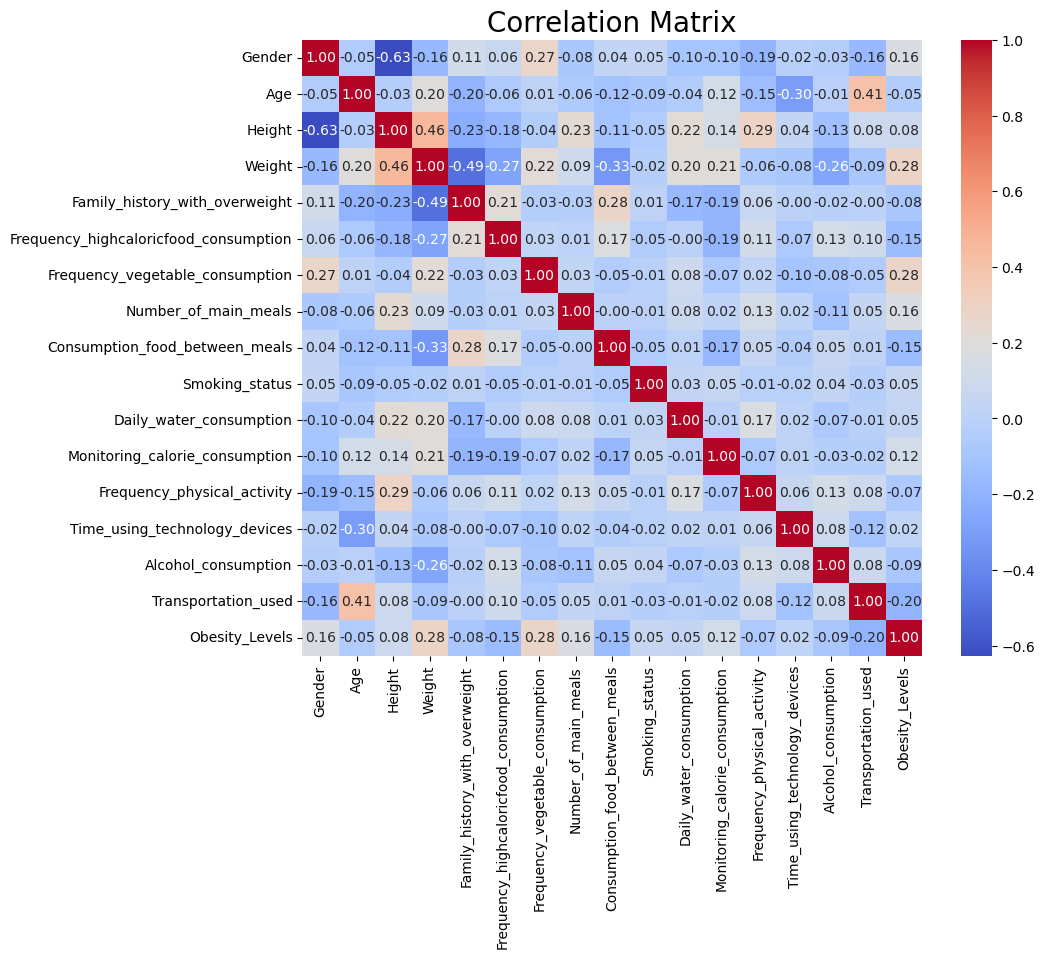

In [52]:
# correlation heatmap
corr = df.corr()
plt.figure(figsize = (10, 8))
plt.title('Correlation Matrix', fontsize = 20)
sns.heatmap(corr, cmap = 'coolwarm', annot = True, fmt=".2f");

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 2087 non-null   int64  
 1   Age                                    2087 non-null   float64
 2   Height                                 2087 non-null   float64
 3   Weight                                 2087 non-null   float64
 4   Family_history_with_overweight         2087 non-null   int64  
 5   Frequency_highcaloricfood_consumption  2087 non-null   int64  
 6   Frequency_vegetable_consumption        2087 non-null   float64
 7   Number_of_main_meals                   2087 non-null   float64
 8   Consumption_food_between_meals         2087 non-null   int64  
 9   Smoking_status                         2087 non-null   int64  
 10  Daily_water_consumption                2087 non-null   float64
 11  Monitorin

In [57]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Family_history_with_overweight',
       'Frequency_highcaloricfood_consumption',
       'Frequency_vegetable_consumption', 'Number_of_main_meals',
       'Consumption_food_between_meals', 'Smoking_status',
       'Daily_water_consumption', 'Monitoring_calorie_consumption',
       'Frequency_physical_activity', 'Time_using_technology_devices',
       'Alcohol_consumption', 'Transportation_used', 'Obesity_Levels'],
      dtype='object')

In [60]:
# univariate
# df_sp = df.Obesity_Levels.value_counts()
# df_sp = pd.DataFrame(df_sp)

# sns.barplot(x= df_sp.index, y = df_sp['Obesity_Levels'])
# plt.xlabel('Obesity Levels')
# plt.ylabel('Count')
# plt.title('Count of Obesity Levels')
# plt.show()

df_sp = df['Correct_Column_Name'].value_counts()
df_sp = df_sp.reset_index()
df_sp.columns = ['Obesity_Levels', 'Count']
sns.barplot(x='Obesity Levels', y='Count', data=df_sp)

KeyError: 'Correct_Column_Name'

In [ ]:
df_sp = df.Family_history_with_overweight.value_counts()
df_sp = pd.DataFrame(df_sp)

sns.barplot(x= df_sp.index, y = df_sp.Family_history_with_overweight)
plt.xlabel('Family History')
plt.ylabel('Count')
plt.title('Count of Patients with Overweight Family History')
plt.show()

In [ ]:
# # Sample data
# y = df['Weight']
# x = df['Height']

# # Create a scatter plot using Seaborn
# sns.regplot(x=x, y=y, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})


# # Add labels and title
# plt.xlabel('Weight in Kilograms')
# plt.ylabel('Family History with Overweight')
# plt.title('Scatter Plot - Family History and Weight')

# # Show the plot
# plt.show()

In [ ]:
df_sp = df.Monitoring_calorie_consumption.value_counts()
df_sp = pd.DataFrame(df_sp)

sns.barplot(x= df_sp.index, y = df_sp.Monitoring_calorie_consumption)
plt.xlabel('Calorie Consumption Monitoring')
plt.ylabel('Count')
plt.title('Count of Patients who Monitor Calorie Consumed')
plt.show()

In [ ]:
df.dtypes

In [ ]:
x = df['Frequency_physical_activity']
fig, ax = plt.subplots(figsize = (10,8));
sns.histplot(x);

In [ ]:
sns.countplot(x=df['Smoking_status'],hue=df['Gender']);

In [ ]:
sns.countplot(x=df['Transportation_used'],hue=df['Gender']);

In [ ]:
sns.countplot(x=df['Alcohol_consumption'],hue=df['Gender']);

In [ ]:
plt.figure(figsize=[20, 10])
sns.barplot(x='Obesity_Levels', y="Age", hue="Gender", data = df)
plt.xlabel("Obesity Levels")
plt.ylabel("Age")
plt.title("Obesity Levels vs Age vs Gender")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=[20, 10])
sns.barplot(x='Obesity_Levels', y="Alcohol_consumption", hue="Gender", data = df)
plt.xlabel("Obesity Levels")
plt.ylabel("Alcohol Consumption")
plt.title("Obesity Levels vs Alcohol Consumption vs Gender")
plt.legend()
plt.show()

In [ ]:
# plt.figure(figsize=[20, 10])
# sns.barplot(x='Obesity_Levels', y="Frequency_vegetable_consumption", hue="Gender", data = df)
# plt.xlabel("Obesity Levels")
# plt.ylabel("Frequency of Vegetable Consumption")
# plt.title("Obesity Levels vs Frequency of vegetable consumption vs Gender")
# plt.legend()
# plt.show()

In [ ]:
# Sample data
x = df['Weight']
y = df['Height']

# Create a scatter plot using Seaborn
sns.regplot(x=x, y=y, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})


# Add labels and title
plt.xlabel('Weight in Kilograms')
plt.ylabel('Height in Meters')
plt.title('Scatter Plot - Height and Weight')

# Show the plot
plt.show()

In [ ]:
weight_mean = df.groupby('Obesity_Levels')['Weight'].mean().sort_values()
weight_mean.plot(kind='barh')
plt.style.use('ggplot')
plt.xlabel('Average Weight', fontsize = 16)
plt.ylabel('Obesity Levels',fontsize = 16)
plt.title('Average Weight by Obesity Levels', fontsize = 16);

In [ ]:
sns.boxplot(data=df, x='Age');

In [ ]:
sns.boxplot(data=df, x='Weight');

In [ ]:
sns.boxplot(data=df, x='Height');

In [ ]:
plt.figure(figsize=[20, 10])
sns.barplot(x='Transportation_used', y="Age", hue="Gender", data = df)
plt.xlabel("Modes of Transportation")
plt.ylabel("Age")
plt.title("Modes of Transportation vs Age vs Gender")
plt.legend()
plt.show()

##Pre-processing

Prepare the data appropriately for modeling

Implement a preprocessing pipeline to avoid data leakage.

Scale the data if your model requires it.

Write a justification for how you encode the variables (one-hot encoding).

In [ ]:
# load new cleaned df
filename = ('/content/cleaned_dataset.xlsx')
clean_df = pd.read_excel(filename)
clean_df.head()

In [ ]:
clean_df['Obesity_Levels'].unique()

In [ ]:
clean_df.dtypes

In [ ]:
clean_df['Transportation_used'].unique()

In [ ]:
# Split the data into training and validation sets
# identify target y and features x

X = clean_df.drop(columns=['Obesity_Levels'])
y = clean_df['Obesity_Levels']
X.head()

In [ ]:
# split training and test
# set random_state to 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Ordinal Encoding 'Gender'
change_dictionary = {'Male':0, 'Female':1}
clean_df['Gender'].replace(change_dictionary, inplace=True)
clean_df['Gender']

In [ ]:
#instantiate the encoder
scaler = StandardScaler()
scaler2 = StandardScaler()
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [ ]:
# clean_df['Alcohol_consumption'].unique()

In [ ]:
clean_df['Consumption_food_between_meals'].unique()

In [ ]:
food_consume = ['no', 'Sometimes', 'Frequently', 'Always']
alcohol_consume = ['Sometimes', 'Frequently', 'Always', 'no']

ordered_labels = [food_consume, alcohol_consume]
ordered_labels

In [ ]:
# instantiate code
ordinal_enc = OrdinalEncoder(categories=ordered_labels)

In [ ]:
# create a pipeline for nominal, numeric and ordinal data

# nominal data -> imputer, one-hot encode
nom_pipe = make_pipeline(encoder)

# ordinal data -> imputer, ordinal encoding, scaling
ord_pipe = make_pipeline(ordinal_enc, scaler2)

# numeric data -> imputer, scaler
num_pipe = make_pipeline(scaler)




# # instantiate the column selectors
# # create a var that contains only the cols with dtypes object and number
# num_selector = make_column_selector(dtype_include='number')
# cat_selector = make_column_selector(dtype_include='object')

In [ ]:
clean_df.columns

In [ ]:
# select the column corresponding to the type of data
ordinal_cols = ['Consumption_food_between_meals','Alcohol_consumption']
nominal_cols = ['Family_history_with_overweight', 'Frequency_highcaloricfood_consumption', 'Smoking_status', 'Monitoring_calorie_consumption', 'Transportation_used', 'Gender']
num_selector = make_column_selector(dtype_include='number')

# # pairing of pipeline and the corresponding columns
nom_tuple = (nom_pipe, nominal_cols)
ord_tuple = (ord_pipe, ordinal_cols)
num_tuple = (num_pipe, num_selector)

In [ ]:
preprocessor = make_column_transformer(ord_tuple, num_tuple, nom_tuple, remainder='passthrough')

In [ ]:
preprocessor.fit(X_train)

In [ ]:
# Define a function that takes in arguments and prints out a classification report and confusion matrices
def evaluate_classification(model, X_test, y_test, cmap=None,
                            normalize='true', classes=None, figsize=(20,8)):
  """Given a model, features, and labels, prints a classification report and
  confusion matrices"""

  test_preds = model.predict(X_test)
  print(metrics.classification_report(y_test, test_preds, target_names=classes))

  fig, ax = plt.subplots(ncols=2, figsize=figsize)
  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Greens',
                                        display_labels=classes,
                                        ax=ax[0])
  ax[0].set_title('Not Normalized')

  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues',
                                        display_labels=classes, normalize='true',
                                        ax=ax[1])
  ax[1].set_title('Normalized Along True Axis')

  plt.show()

##Machine Learning Model - Random Forest

In [ ]:
# instantiate the model
rforr = RandomForestClassifier()

# create ML pipe
rforr_pipe = make_pipeline(preprocessor, rforr)

# fit the model
rforr_pipe.fit(X_train, y_train)

In [ ]:
# Run a classification report on both train and test datasets for the best model.
rforr_train_pred = rforr_pipe.predict(X_train)
rforr_test_pred = rforr_pipe.predict(X_test)

print('training scores')
print(classification_report(y_train, rforr_train_pred))

print('testing scores')
print(classification_report(y_test, rforr_test_pred))

In [ ]:
# # evaluate the model
evaluate_classification(rforr_pipe, X_test, y_test)

In [ ]:
# plt.figure(figsize = (18,8))
# sns.heatmap(metrics.confusion_matrix(y_test, rforr_test_pred), annot = True, xticklabels = y_test.unique(), yticklabels = y_test.unique(), cmap = 'summer')
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.show()

In [ ]:
# hyperparameter tuning using GridSearchCV
rforr_pipe.get_params()

In [ ]:
# select params
params = {
    'randomforestclassifier__max_depth': [1, 2, 15],
    'randomforestclassifier__max_leaf_nodes': [1, 25]}

In [ ]:
# create ML pipe
rforr_pipe2 = make_pipeline(preprocessor, rforr)

# instantiate the grid
rforr_grid = GridSearchCV(estimator = rforr_pipe2, param_grid = params,
                        scoring = 'accuracy', cv = 3, verbose = 1, n_jobs = -1)

In [ ]:
# fit the model
rforr_grid.fit(X_train, y_train)

In [ ]:
# get the best params
rforr_grid.best_params_

In [ ]:
# save the params
rforr_cv = rforr_grid.best_estimator_

In [ ]:
# fit the model using best params
rforr_cv.fit(X_train, y_train)

In [ ]:
# run predictions and classification report
rforr_cv_train_pred = rforr_cv.predict(X_train)
rforr_cv_test_pred = rforr_cv.predict(X_test)

print('training scores')
print(classification_report(y_train, rforr_cv_train_pred))

print('testing scores')
print(classification_report(y_test, rforr_cv_test_pred))

In [ ]:
plt.figure(figsize = (18,8))
sns.heatmap(metrics.confusion_matrix(y_test, rforr_cv_test_pred), annot = True, xticklabels = y_test.unique(), yticklabels = y_test.unique(), cmap = 'summer')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# evaluate the model
evaluate_classification(rforr_cv, X_test, y_test)

##Machine Learning: KNN

In [ ]:
# instantiate the model
knn = KNeighborsClassifier()

# combine the preprocessor object and the KNN regression model in a pipeline
knn_pipe = make_pipeline(preprocessor, knn)

# fit your pipe on the training data
knn_pipe.fit(X_train, y_train)

In [ ]:
# Run a classification report on both train and test datasets for the best model.
knn_train_pred = knn_pipe.predict(X_train)
knn_test_pred = knn_pipe.predict(X_test)

print('training scores')
print(classification_report(y_train, knn_train_pred))

print('testing scores')
print(classification_report(y_test, knn_test_pred))

In [ ]:
# evaluate the model
evaluate_classification(knn_pipe, X_test, y_test)

In [ ]:
# hyperparameter tuning using GridSearchCV
knn_pipe.get_params()

In [ ]:
# select params
params = {'kneighborsclassifier__n_neighbors': range(1, 5, 20),
          'kneighborsclassifier__weights':['uniform','distance']
          }

In [ ]:
# create ML pipe
knn_pipe2 = make_pipeline(preprocessor, knn)

# instantiate the grid
knn_grid = GridSearchCV(estimator = knn_pipe2, param_grid = params,
                        scoring = 'accuracy', cv = 3, verbose = 1, n_jobs = -1)

# fit the model
knn_grid.fit(X_train, y_train)

In [ ]:
# get the best params
knn_grid.best_params_

In [ ]:
# save the params
knn_cv = knn_grid.best_estimator_

In [ ]:
# fit the model using best params
knn_cv.fit(X_train, y_train)

In [ ]:
# Run a classification report on both train and test datasets for the best model.
knn2_train_pred = knn_cv.predict(X_train)
knn2_test_pred = knn_cv.predict(X_test)

print('training scores')
print(classification_report(y_train, knn2_train_pred))

print('testing scores')
print(classification_report(y_test, knn2_test_pred))

##Machine Learning: XGBoost

In [ ]:
# # # ordinal encode Obesity_Levels

# change_dictionary = {'Normal_Weight':0,
#                      'Overweight_Level_I':1,
#                      'Overweight_Level_II':2,
#                      'Overweight_Level_III':3,
#                      'Obesity_Type_I':4,
#                      'Obesity_Type_II':5,
#                      'Obesity_Type_III':6,
#                      'Insufficient_Weight':7}
# clean_df['Obesity_Levels'].replace(change_dictionary, inplace=True)
# clean_df['Obesity_Levels']

change_dictionary = {
    'Normal_Weight': 0,
    'Overweight_Level_I': 1,
    'Overweight_Level_II': 2,
    'Obesity_Type_I': 3,
    'Obesity_Type_II': 4,
    'Obesity_Type_III': 5,
    'Insufficient_Weight': 6
}

In [ ]:
# Apply this encoding to your y_train dataset
y_train_encoded = y_train.replace(change_dictionary)

In [ ]:
# Apply this encoding to your y_train dataset
y_test_encoded = y_test.replace(change_dictionary)

In [ ]:
# instantiate the model
xgb = XGBClassifier()

# create ML pipe
xgb_pipe=make_pipeline(preprocessor,xgb)

In [ ]:
# fit the model
# xgb_pipe.fit(X_train,y_train)

# fit the model
xgb_pipe.fit(X_train,y_train_encoded)

In [ ]:
# Run a classification report on both train and test datasets for the best model.
xgb_train_pred = xgb_pipe.predict(X_train)
xgb_test_pred = xgb_pipe.predict(X_test)

print('training scores')
print(classification_report(y_train_encoded, xgb_train_pred))

print('testing scores')
print(classification_report(y_test_encoded, xgb_test_pred))

In [ ]:
# hyperparameter tuning using GridSearchCV
xgb_pipe.get_params()

In [ ]:
# select params
params ={
    'xgbclassifier__learning_rate': [0.01, 0.05, 0.1, 0.5],
    'xgbclassifier__n_estimators': [10,50],
    'xgbclassifier__max_depth': [3,4]
    }

In [ ]:
# create ML pipe
xgb2_pipe = make_pipeline(preprocessor, xgb)

# instantiate the grid
xgb2_grid = GridSearchCV(estimator = xgb2_pipe, param_grid = params,
                        scoring = 'accuracy', cv = 3, verbose = 1, n_jobs = -1)

In [ ]:
# fit the model
xgb2_grid.fit (X_train, y_train_encoded)

In [ ]:
# get the best params
xgb2_grid.best_params_

In [ ]:
# save the params
xgb_cv = xgb2_grid.best_estimator_

In [ ]:
# fit the model using best params
xgb_cv.fit(X_train, y_train_encoded)

In [ ]:
# Run a classification report on both train and test datasets for the best model.
xgb2_train_pred = xgb_cv.predict(X_train)
xgb2_test_pred = xgb_cv.predict(X_test)

print('training scores')
print(classification_report(y_train_encoded, xgb2_train_pred))

print('testing scores')
print(classification_report(y_test_encoded, xgb2_test_pred))

In [ ]:
# evaluate the model
evaluate_classification(xgb_cv, X_test, y_test_encoded)